In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Model parameteres
ms = 50.
g =9.81 #m/s2
rho = 1.091 #kg/m^3
r = 0.5 #m
A = numpy.pi*r**2
ue = 325. #m/s
Cd = 0.15
mp = 100. #kg
mpdot = 20. #burn rate

#Initial conditions
h0 = 0. #initial height
v0 =0.  #initial velocity


In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]

    return numpy.array([v,-g +(mpdot*ue)/(ms+mp) - \
                        (0.5*rho*v*abs(v)*A*Cd)/(ms +mp)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

We know that until 5 seconds the burn rate is 20kg/s. Starting from 5 seconds, it drops to 0.

In [5]:
T = 40.   
dt =0.1
N = int(T/dt)+1  
t = numpy.linspace(0.0,T,N) 
u = numpy.empty((N,2))
u[0] = numpy.array([h0,v0])

In [6]:
mp =100.
mpdot =20
for n in range(N-1):
    mp=mp-(mpdot*dt)
    if (mp<=0):
        mp = 0
        mpdot =0
    u[n+1]=euler_step(u[n], f, dt)

In [7]:
h= u[0:n,0]
v= u[0:n,1]
t= t[0:n]

In [8]:
for n in range(N-1):
    if (u[n+1,0])<0:
        flightend = n*dt
        print('flightend = %a' %flightend)
        endvelocity = (u[n+1,1])
        print('velocity at end of flight = %e' % endvelocity)
        break

flightend = 36.7
velocity at end of flight = -8.594975e+01


In [9]:
vmax =v.argmax()
maxvel = (v[vmax])
print('maximum velcoity is= %f' % maxvel)
timeofmaxvel = ((vmax+1)*dt)
print('Time when max velocity occurs %g secs' %timeofmaxvel)
print(h[vmax])

maximum velcoity is= 230.720089
Time when max velocity occurs 5 secs
509.982213283


1316.62009418
156
15.7


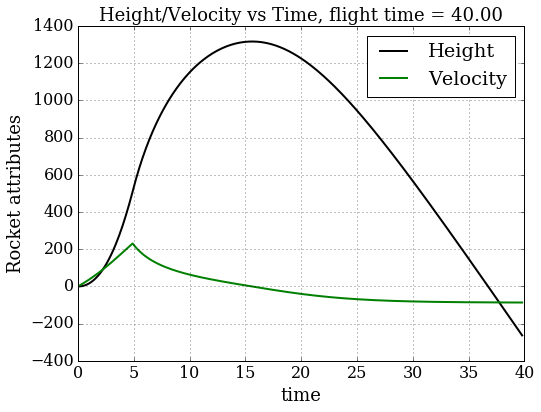

In [10]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'time', fontsize=18)
pyplot.ylabel(r'Rocket attributes', fontsize=18)
pyplot.xlim(0,T)
#pyplot.ylim(0, 1500)
pyplot.title('Height/Velocity vs Time, flight time = %.2f' % T, fontsize=18)
pyplot.plot(t,h, 'k-', lw=2);
pyplot.plot(t,v, 'g-', lw=2);
pyplot.legend(["Height", "Velocity"])
hmax = h.argmax()
print(h[hmax])
print(hmax)
print((hmax+1)*dt)